In [4]:
import os
import pickle
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.colors import Normalize
import traceback
import matplotlib.gridspec as gridspec

'''
Obviously need SimInfo pickles from Config_dir
Update the newest Merians from update_merians.ipynb
what needs to be run to make this work
Reff and Profiles from ImageCollection, dont think I need to run isophote masking, except maybe for x00y00
StShapes, DMShapes from 3DShapes
smoothed shapes from 3DShapesSmoothing
halotypes from halotypes.py, in the case of Merians they are all simply centrals
masses from get_masses.py
try/except blocks should catch any mismatches, so don't need to worry too much about everything being perfect. 
'''
    
def T(ba,ca):
    return( (1-ba**2)/(1-ca**2) )



In [5]:
import StellarDMTracing as sdt

#define color scheme to use for plots as a dict


In [ ]:
def main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,label,reff_multi =1):
    data_type = 'all'


    print(len(masses),len(htype))
    #condition0 = (np.log10(10**masses/mvir) < -2)  &  (( C_s >.5 ) & (B_s > .6 )) & (( C_d >.5 ) & (B_d > .6 )) & (masses > 6) & (masses < 9) & (reff < 1)
    #print(sum(condition0))
            
    mb = np.log10(10**masses/mvir)

    

    

    T_diff = np.array((T_d - T_s))
    avg_B = 1#np.average([B_d, B_s], axis=0)
    avg_C = 1#np.average([C_d, C_s], axis=0)
    distances = (np.sqrt(((B_d - B_s) / avg_B) ** 2 + ((C_d - C_s) / avg_C) ** 2))

    #angles = compute_angle_between_ellipsoids(Ed, Es)
    #print(angles[0])



    # Define conditions
    
    #condition1 = (mb < -2)  &  (( C_s >.5 ) & (B_s > .6 )) & (( C_d >.5 ) & (B_d > .6 )) & (masses > 6) & (masses < 9) & (reff < 1)
    #print(sum(condition1))
    #(mb < -1.5) & ((C_s > 0.5) & (B_s > 0.6)) & ((C_d > 0.4) & (B_d > 0.5)) & (masses > 6) & (masses < 9) & (reff < 1)


    
    ### initialize conditions filters ###
    condition = (mb < -2.5)  
    cm = masses
    #condition1 = feedback_type == 'MerianCDM'
    #condition2 = feedback_type == 'BW'
    #condition3 = T_s <.3 
    #condition6 = T_s >.7
    #conditions = [("All", None),('Dark Matter Dominated',condition), ("Merians", condition1), ('DCJL+Marvel',condition2), ('Disky',condition3), ('Prolate',condition6)]
    conditions = [("Marvel+DCJL+Merians", None),]
    #create_histograms(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, conditions,reff_multi)
    plt.close()

    # n = len(conditions)
    # rows = n // 2
    # if n % 2 != 0:
    #     rows += 1
    n = 1


    #axes = axes.flatten()
    # mean_T_diff,std_T_diff, mean_distances , std_distances = np.zeros((n)),np.zeros((n)),np.zeros((n)),np.zeros((n))
    # for i, (label, condition) in enumerate(conditions):
    #     print(label)
    #     print(condition)
    #     mean_T_diff[i],std_T_diff[i], mean_distances[i] , std_distances[i] = analyze_distances(T_diff, distances, condition=condition)
    #     plot_data(axes[i], B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir,feedback_type, condition=condition)
    #     axes[i].set_title(label)
    
    sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, condition=None)
    
    
    # Save the figure
    plt.tight_layout()
    plt.savefig(f'../../Figures/3DShapes/SVQ_hist_combined.{reff_multi}.png', dpi=300)
    #plt.close()
    #print(Ed[0,:,:])
    #plot_ellipsoid_axes(Ed[1,:,:], Es[1,:,:])
    sdt.T_vs_Mstar(T_d,T_s,masses,mb,htype,label)    
    plt.close()
    
    # distances = np.sqrt((B_d - B_s)**2 + (C_d - C_s)**2)
    # plt.figure()
    # plt.scatter(masses,distances)
    # plt.xlabel('Stellar Mass')
    # plt.ylabel('Shape Distance')
    # plt.show()

    return mean_T_diff,std_T_diff, mean_distances, std_distances

    





#r = np.array((.25,.5,.75,1,1.25,1.5,2))
r = np.array((1,))
n = 1
mean_T_diff = np.zeros((n, len(r)))
std_T_diff = np.zeros((n, len(r)))
mean_distances = np.zeros((n, len(r)))
std_distances = np.zeros((n, len(r)))
SimFilePath = ['../PickleFiles/SimulationInfo.BW.pickle','../PickleFiles/SimulationInfo.MerianCDM.pickle']
MassPath = ['../../Data/BasicData/Marvel_DCJL.Masses.pickle','../../Data/BasicData/MerianCDM.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.txt','../../Data/BasicData/HaloTypes.MerianCDM.txt']
feedback = ['BW','MerianCDM']

for i in range(0, len(r) ):
    
    mean_T_diff[:,i],std_T_diff[:,i], mean_distances[:,i] , std_distances[:,i] = main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,label = 'CDM',reff_multi = r[i])

#mean_T_diff[:,i],std_T_diff[:,i], mean_distances[:,i] , std_distances[:,i] = main(r[i])
#plt.errorbar(r,mean_T_diff,std_T_diff)
#plt.errorbar(r,mean_distances,std_distances)

In [6]:
feedbacks = ['BWMDC', 'MerianCDM']
#feedbacks = [ 'MerianCDM']

import importlib
importlib.reload(sdt)
B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,mb_reff,mb_10rvir,htype,reff,mvir,feedback_type,sims,hids,mergers,rvir,diffs_at_reff, jz_jcirc_avgs = sdt.LoadSimData(feedbacks,return_sims=True)



['../PickleFiles/SimulationInfo.BWMDC.pickle', '../PickleFiles/SimulationInfo.MerianCDM.pickle']
stellar b/a and c/a unusually low in sim cptmarvel halo 10


['cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel'
 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'elektra'
 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm' 'storm'
 'storm' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue'
 'rogue']
['h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h148' 'h229' 'h229'
 'h229' 'h229' 'h242' 'h242']
['rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue'
 'r442' 'r468' 'r488' 'r489' 'r492' 'r502' 'r515' 'r523' 'r544' 'r552'
 'r555' 'r556' 'r563' 'r569' 'r571' 'r597' 'r613' 'r614' 'r615' 'r618'
 'r634' 'r642' 'r656' 'r716' 'r718' 'r753' 'r761' 'r850' 'r852' 'r886'
 'r916' 'r918' 'r977']


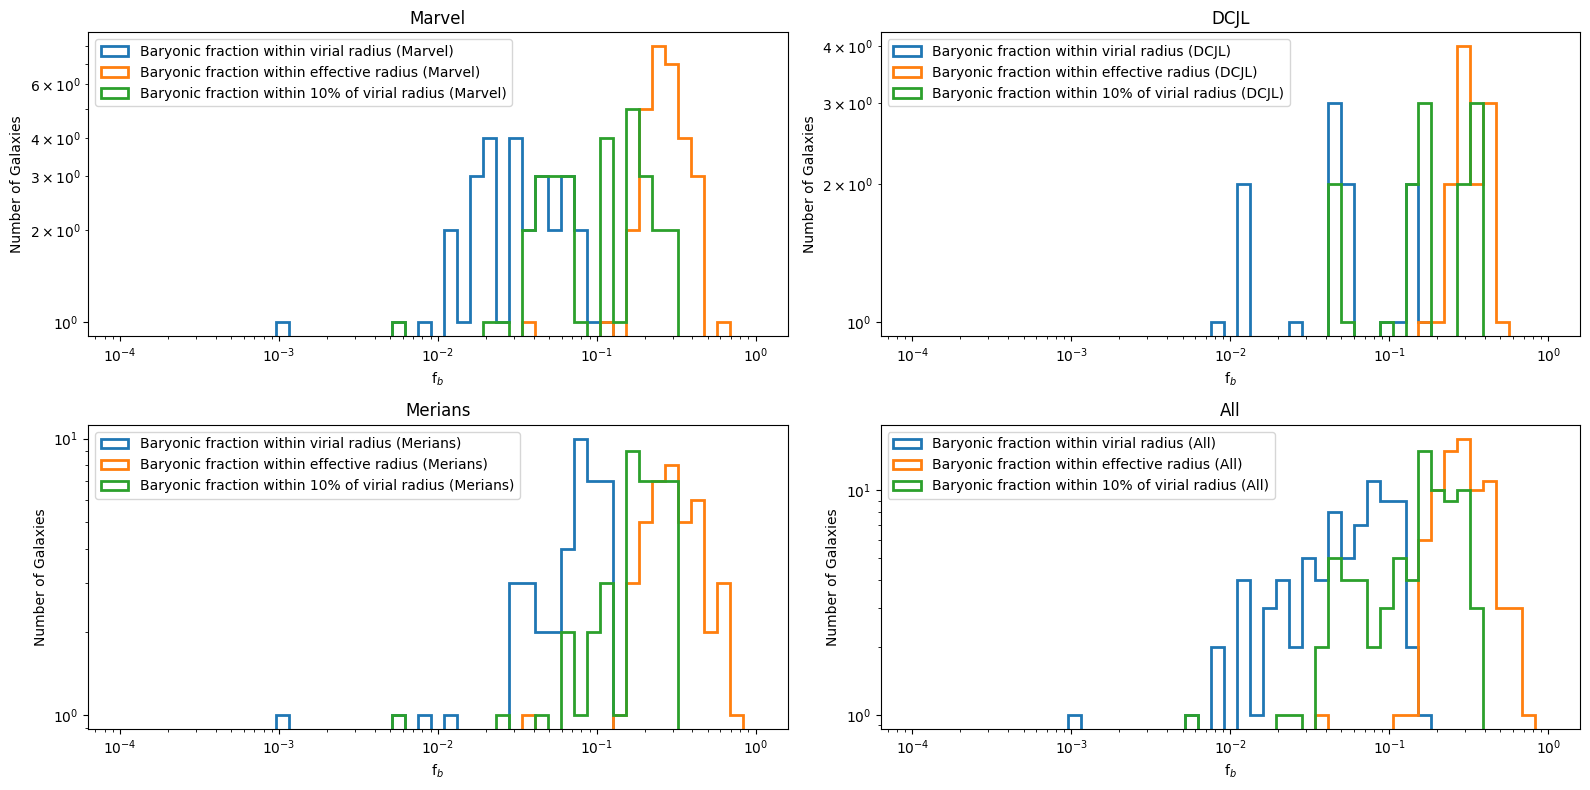

In [7]:
#create histograms of mb,mb_reff,mb_10rvir
#plot histograms of mb,mb_reff,mb_10rvir
#create histograms of mb, mb_reff, mb_10rvir with outline only

#split into marvel, DCJL, Merians
#marvel is composed of sims with names cptmarvel,storm,rogue,elektra,
#DCJL is composed of sims with names h148 h229 h242 h329 
#Merians have sim names like r with a number following it

#create marvel mask
marvel_mask = np.zeros(len(sims),dtype=bool)
for sim in ['cptmarvel','storm','rogue','elektra']:
    marvel_mask[sims == sim] = True

print(sims[marvel_mask])
#DCJL mask
DCJL_mask = np.zeros(len(sims),dtype=bool)
for sim in ['h148','h229','h242','h329']:
    DCJL_mask[sims == sim] = True
print(sims[DCJL_mask])

#Merians mask
Merians_mask = np.zeros(len(sims),dtype=bool)
for sim in sims:
    if sim[0] == 'r':
        Merians_mask[sims == sim] = True
print(sims[Merians_mask])



    

import matplotlib.pyplot as plt
import numpy as np

def plot_histograms_with_masks(mb, mb_reff, mb_10rvir, feedback_type, masks_labels):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    #flatten axes
    axes = axes.flatten()
    bins = np.logspace(-4, 0, 50).tolist()
    lw = 2
    
    for ax, (mask, label) in zip(axes, masks_labels):
        ax.hist(mb[mask], bins=bins, alpha=1, label=f'Baryonic fraction within virial radius ({label})', histtype='step', lw=lw)
        ax.hist(mb_reff[mask], bins=bins, alpha=1, label=f'Baryonic fraction within effective radius ({label})', histtype='step', lw=lw)
        ax.hist(mb_10rvir[mask], bins=bins, alpha=1, label=f'Baryonic fraction within 10% of virial radius ({label})', histtype='step', lw=lw)
        ax.set_xlabel(r'f$_b$')
        ax.set_ylabel('Number of Galaxies')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend()
        ax.set_title(label)

    plt.tight_layout()
    plt.show()

# Example usage:
masks_labels = [(marvel_mask, 'Marvel'), (DCJL_mask, 'DCJL'), (Merians_mask, 'Merians'), (np.ones(len(sims),dtype=bool), 'All')]
plot_histograms_with_masks(mb, mb_reff, mb_10rvir, feedback_type, masks_labels)




[ 1  2  3  5  6  7  1  2  3  4  5  9 10  1  2  3  4  5  6  7  8 14 31  1
  3  7  8 10 11 12 15 28  2  3  4  6  7 11 12 23  2  3  6 18  8 10  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1]
cptmarvel 1 e
cptmarvel 2 e
cptmarvel 3 e
cptmarvel 5 e
cptmarvel 6 e
cptmarvel 7 e
cptmarvel 10 e
elektra 1 d
elektra 2 e
elektra 3 e
elektra 4 e
elektra 5 e
elektra 9 e
elektra 10 e
storm 1 d
storm 2 d
storm 3 e
storm 4 d
storm 5 e
storm 6 e
storm 7 e
storm 8 e
storm 14 e
storm 31 e
rogue 1 e
rogue 3 d
rogue 7 e
rogue 8 e
rogue 10 e
rogue 11 e
rogue 12 e
rogue 15 e
rogue 28 e
h148 2 d
h148 3 d
h148 4 d
h148 6 d
h148 7 e
h148 11 e
h148 12 e
h148 23 e
h148 27 e
h148 38 e
h148 65 e
h229 2 d
h229 3 e
h229 6 e
h229 18 e
h242 8 e
h242 10 e
h329 7 e
r431 1 d
r442 1 d
r468 1 e
r488 1 e
r489 1 e
r492 1 d
r502 1 e
r515 1 d
r523 1 d
r544 1 d
r552 1 d
r555 1 e
r556 1 e
r563 1 e
r568 1 d
r569 1 d
r571 1 d
r597 1 d
r613 1 d
r614 1 d
r615 1 i
r618 1 i
r634 1 d


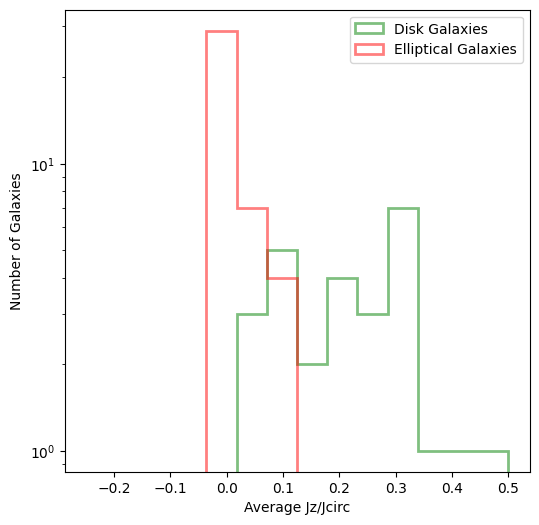

In [32]:

#mask out disk galaxies
#list of sims halos with disk galaxies
# disk_sims_pickle = 'disk_sims_results.pickle'
#
# disk_sims = pickle.load(open(disk_sims_pickle,'rb'))
disk_sims = {}
for feedback in feedbacks:
    # with open(f'galaxy_classifications_{feedback}.pickle', 'wb') as f:
    #     pickle.dump(classified_galaxies, f)
    try:
        with open(f'galaxy_classifications_{feedback}.pickle', 'rb') as f:
            classified_galaxies = pickle.load(f)
            disk_sims.update(classified_galaxies)
    except FileNotFoundError:
        print(f'File galaxy_classifications_{feedback}.pickle not found')
        continue


#combine all classified galaxies


print(hids)
mask = np.zeros(len(sims), dtype=bool)
disk_mask = np.zeros(len(sims), dtype=bool)
ellip_mask = np.zeros(len(sims), dtype=bool)
irr_mask = np.zeros(len(sims), dtype=bool)

for sim in disk_sims:
    for halo in disk_sims[sim]:
        disk_sim = disk_sims[sim][halo]
        # Find indices where both sims and hids match the current sim and halo
        indices = (sims == sim) & (hids == halo)
        print(sim, halo, disk_sim)
        if disk_sim == 'd':
            disk_mask[indices] = True
        elif disk_sim == 'i':
            irr_mask[indices] = True
        elif disk_sim == 'e':
            ellip_mask[indices] = True
        else:
            print('Error: disk_sim not recognized')
            print(sim, halo)
            print(disk_sim)
            break


print(sum(disk_mask),sum(ellip_mask),sum(irr_mask),sum(disk_mask)+sum(ellip_mask)+sum(irr_mask),len(sims))
#print(mask)
import importlib
importlib.reload(sdt)
from StellarDMTracing import colors
#sdt.plot_data_with_disky(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, mask,
                         #mergers=None, show_lines=True, show_scatter=True)

#check with jz_jcirc_avgs
#plot histogram of jz_jcirc_avgs
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
bins = np.linspace(-.25, .5, 15)
#ax.hist(jz_jcirc_avgs, bins=bins, alpha=.5, label='All Galaxies', color='k', histtype='step', lw=2)
ax.hist(jz_jcirc_avgs[disk_mask], bins=bins, alpha=.5, label='Disk Galaxies', color='g', histtype='step', lw=2)
ax.hist(jz_jcirc_avgs[ellip_mask], bins=bins, alpha=.5, label='Elliptical Galaxies', color='r', histtype='step', lw=2)
ax.set_yscale('log')
ax.set_xlabel('Average Jz/Jcirc')
ax.set_ylabel('Number of Galaxies')
ax.legend()
plt.show()




In [9]:

print(sys.path)

['/home/blake/.local/share/JetBrains/Toolbox/apps/pycharm-professional/plugins/python/helpers-pro/jupyter_debug', '/home/blake/.local/share/JetBrains/Toolbox/apps/pycharm-professional/plugins/python/helpers/pydev', '/home/bk639/MorphologyMeasurements/Code/IntrinsicShapes', '/home/bk639/miniconda3/envs/shapes/lib/python312.zip', '/home/bk639/miniconda3/envs/shapes/lib/python3.12', '/home/bk639/miniconda3/envs/shapes/lib/python3.12/lib-dynload', '', '/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages', '/home/bk639/MorphologyMeasurements/Code']


In [10]:

# add ../ to path
import sys
import os
sys.path.append('/home/bk639/MorphologyMeasurements/Code')

In [15]:
print(data)

{'B_s': array([0.82134376, 0.69913126, 0.80300167, 0.69699524, 0.8934821 ,
       0.74084277, 0.72587769, 0.88055002, 0.70520507, 0.63185348,
       0.87080283, 0.88196245, 0.74471457, 0.80408821, 0.66514139,
       0.83569568, 0.8452056 , 0.84488302, 0.70105568, 0.93446995,
       0.57061218, 0.84265846, 0.90659642, 0.93762665, 0.80752987,
       0.8765508 , 0.96573083, 0.78756019, 0.86279689, 0.84602935,
       0.83631586, 0.83331095, 0.65635166, 0.77340424, 0.87051032,
       0.80573038, 0.77883799, 0.81316113, 0.65276242, 0.89113612,
       0.90937157, 0.71043807, 0.78106342, 0.90694289, 0.82915958,
       0.94288901, 0.65677166, 0.80295733, 0.66856907, 0.82511227,
       0.70921523, 0.81470402, 0.8458847 , 0.87688019, 0.93337485,
       0.84902386, 0.57966739, 0.64853464, 0.56821472, 0.79824147,
       0.88909883, 0.90250894, 0.8687428 , 0.89070172, 0.57895298,
       0.61387534, 0.94852294, 0.93053334, 0.89196773, 0.63692834,
       0.73187139, 0.80809361, 0.67599225, 0.74360655,

['Callable', 'Dict', 'GeneralPlotter', 'List', 'Optional', 'Tuple', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'gridspec', 'np', 'plt']
Disky galaxies: B_D/B_* mean: 1.07, std: 0.08
Non-Disky galaxies: B_D/B_* mean: 0.96, std: 0.13
Disky galaxies: C_D/C_* mean: 1.60, std: 0.41
Non-Disky galaxies: C_D/C_* mean: 0.98, std: 0.23
Disky galaxies: T_D/T_* mean: 0.95, std: 0.30
Non-Disky galaxies: T_D/T_* mean: 1.17, std: 0.44


/tmp/ipykernel_1051885/1428892770.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  print(np.sum(diffs_at_reff[:,i]<30)/len(diffs_at_reff[:,i][disky_mask]))


inf
inf
inf


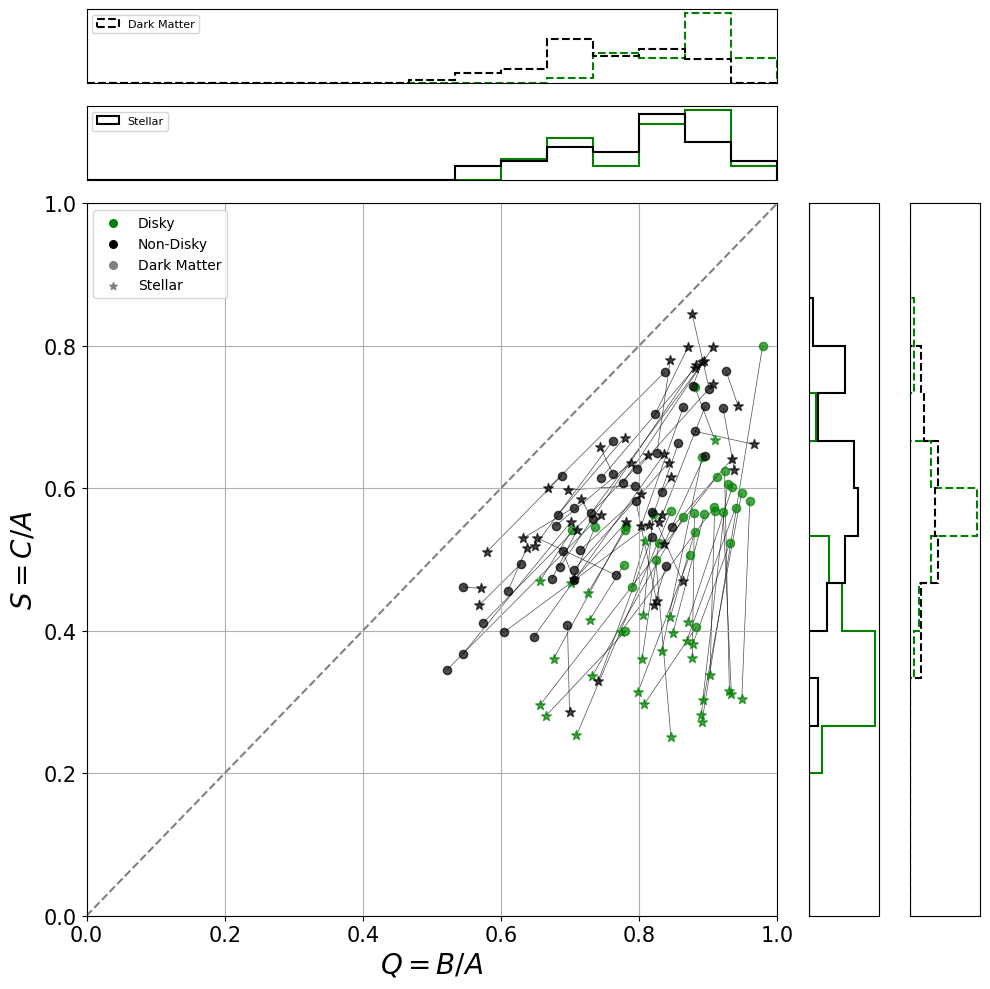

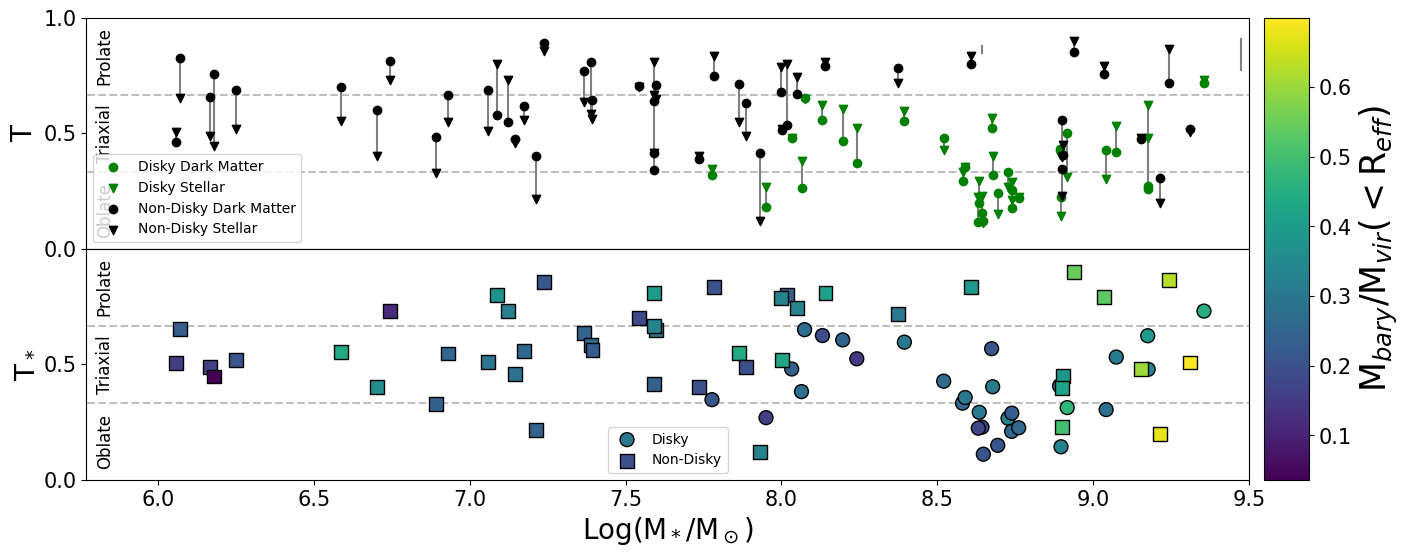

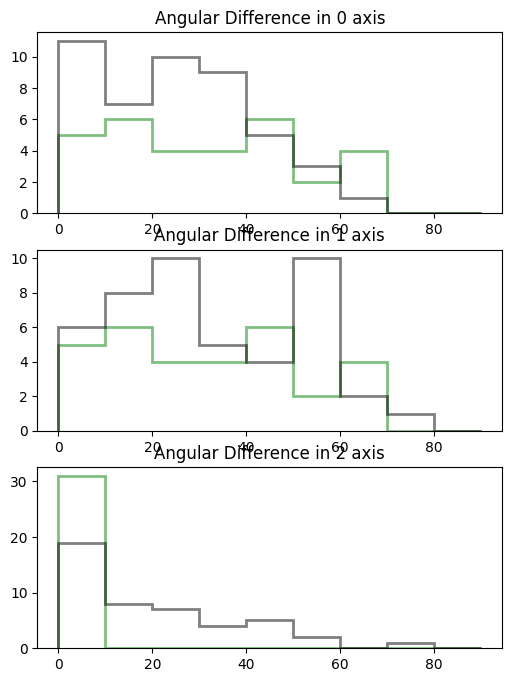

In [35]:

import PlotClasses
#display classes in PlotClasses
print(dir(PlotClasses))
#reload(PlotClasses)
importlib.reload(PlotClasses)
#Usage example:
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'SvQ_disky.png'
disky_mask = mask
data = {
    'B_s': B_s, 'C_s': C_s, 'T_s': T_s, 'B_d': B_d, 'C_d': C_d, 'T_d': T_d,
    'masses': masses, 'mb': mb_reff, 'htype': htype, 'reff': reff, 'mvir': mvir
}
masks = {'disky': disk_mask, 'non-disky': ellip_mask}
labels = {'disky': 'Disky', 'non-disky': 'Non-Disky', 'B': 'Q', 'C': 'S'}
colors = {'disky': 'green', 'non-disky': 'k'}

plotter = pc.GeneralPlotter(data, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass(filename=folder + 'T_vs_Mass_disky.png')

#create histogram of diffs_at_reff for disky and non-disky
fig, ax = plt.subplots(3,1,figsize=(6,8))
bins = np.linspace(0,90,10)
for i in range(3):
    ax[i].hist(diffs_at_reff[:,i][disk_mask],bins=bins,alpha=.5,label='Disky',color='g',histtype='step',lw=2)
    ax[i].hist(diffs_at_reff[:,i][ellip_mask],bins=bins,alpha=.5,label='Non-Disky',color='k',histtype='step',lw=2)
    ax[i].set_title(f'Angular Difference in {i} axis')

    print(np.sum(diffs_at_reff[:,i]<30)/len(diffs_at_reff[:,i][disky_mask]))


AttributeError: Rectangle.set() got an unexpected keyword argument 'c'

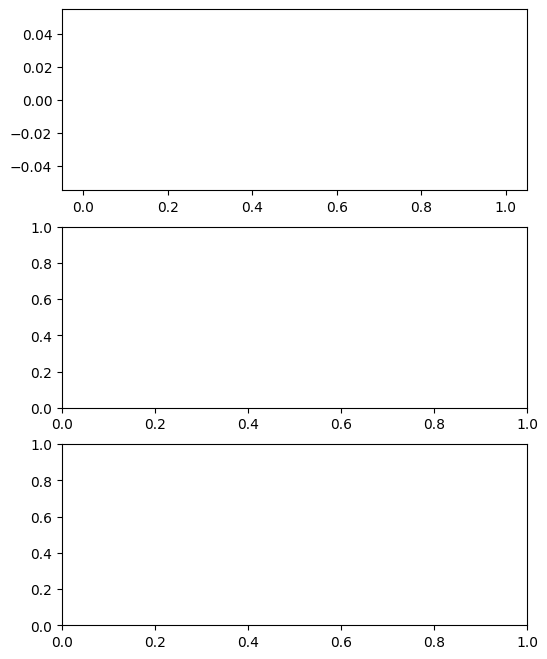

In [37]:
len(feedback_type[feedback_type == 'MerianCDM'])
len(feedback_type[feedback_type == 'BWMDC'])

fig, ax = plt.subplots(3,1,figsize=(6,8))
for i in range(3):
    ax[i].hist(diffs_at_reff[:,i][disky_mask],bins=10,c='g',alpha=.5,label='Disky')
    ax[i].hist(diffs_at_reff[:,i][ellip_mask],bins=10,c='k',alpha=.5,label='Elliptical')
    ax[i].set_title(f'Angular Difference in {i} axis')
    #print count less than 10
    print(np.sum(diffs_at_reff[:,i]<30))


print(diffs_at_reff[sim == 'r615'])


Total number of galaxies: 79
Number of MerianCDM galaxies: 33
Number of BWMDC galaxies: 46
Number of satellites: 0
Number of centrals: 0
Number of disk galaxies: 31
Number of elliptical galaxies: 46
Number of irregular galaxies: 2
Number of Merging galaxies in the last 700Myr: 4
All Galaxies galaxies: B_D/B_* mean: 1.01, std: 0.13
All Galaxies galaxies: C_D/C_* mean: 1.23, std: 0.43
All Galaxies galaxies: T_D/T_* mean: 1.08, std: 0.40
All Galaxies galaxies: B_D/B_* mean: 1.01, std: 0.13
All Galaxies galaxies: C_D/C_* mean: 1.23, std: 0.43
All Galaxies galaxies: T_D/T_* mean: 1.08, std: 0.40


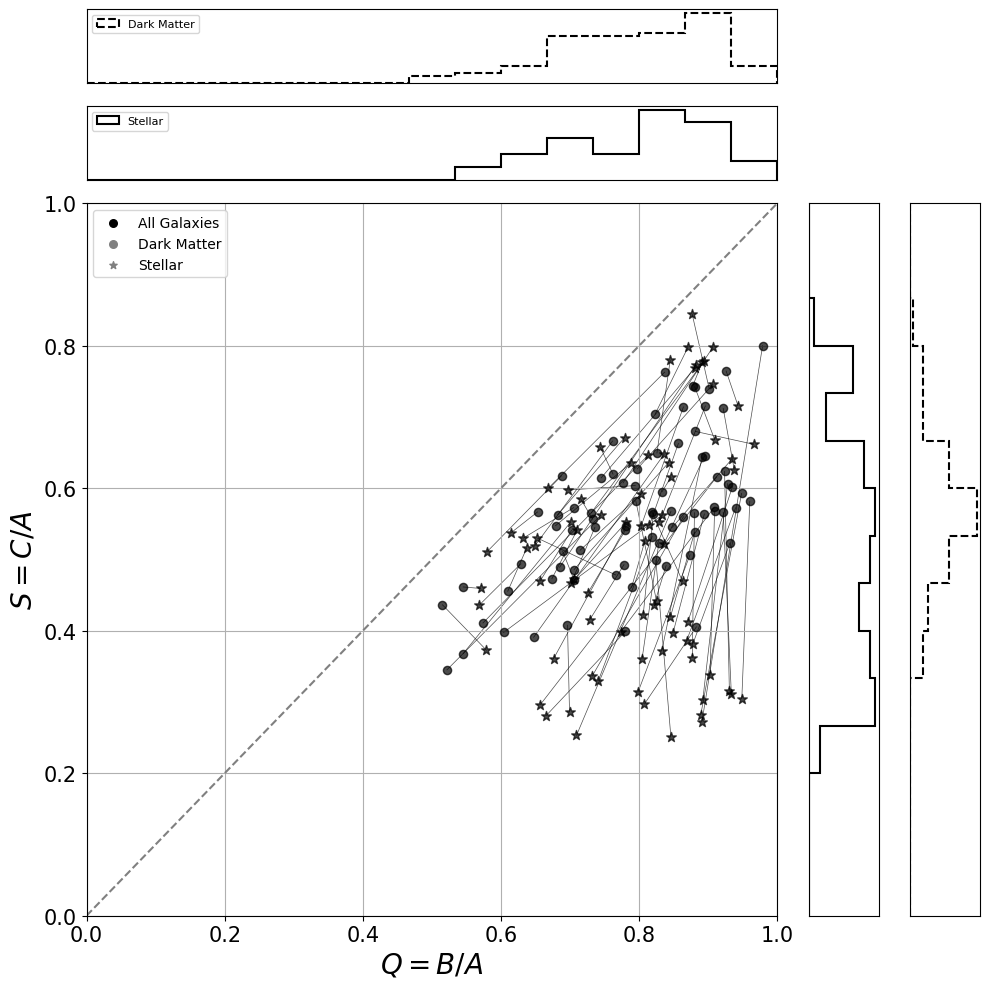

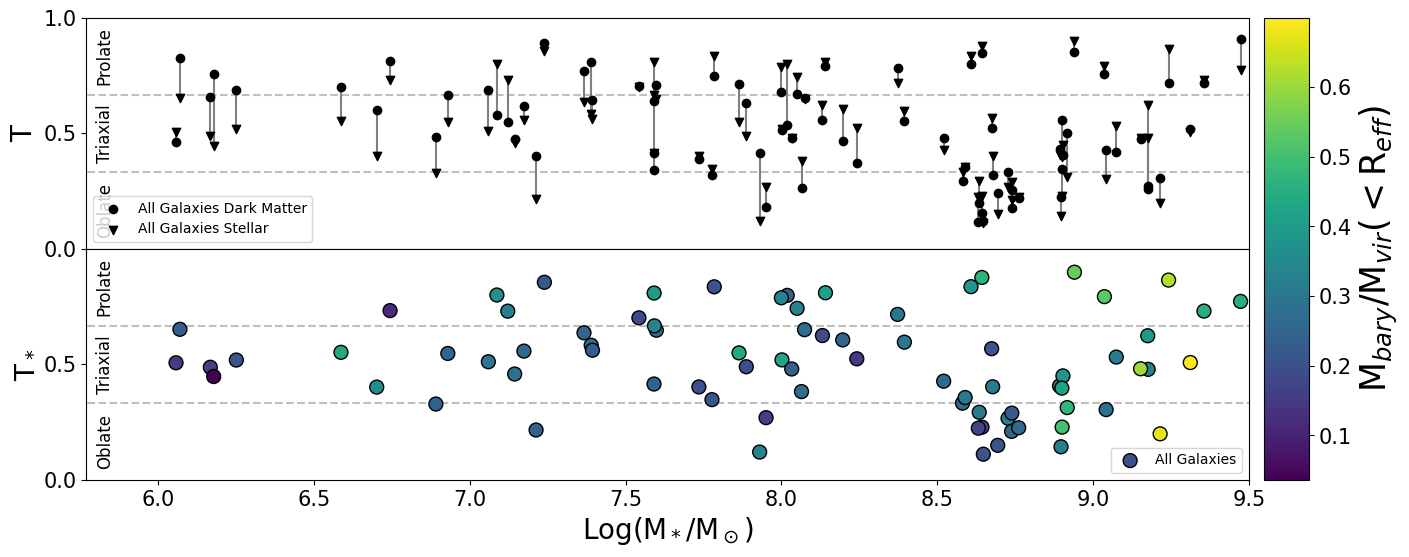

In [38]:

folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'SvQ_plain.png'
feedback_type_mask = feedback_type == 'MerianCDM'
labels = {'MerianCDM': 'Merians', 'BWMDC': 'Marvel + DCJL', 'B': 'Q', 'C': 'S'}
# colors = {'MerianCDM': 'r', 'BWMDC': 'b'}
# masks = {'MerianCDM': feedback_type_mask, 'BWMDC': ~feedback_type_mask}
colors = {'Full Sample': 'k'}
masks = {'Full Sample': np.ones(len(feedback_type),dtype=bool)}
labels = {'Full Sample': 'All Galaxies', 'B': 'Q', 'C': 'S'}

#print sample stats.
#total number of galaxies
print(f'Total number of galaxies: {len(feedback_type)}')
#number of MerianCDM galaxies
print(f'Number of MerianCDM galaxies: {np.sum(feedback_type == "MerianCDM")}')
#number of BWMDC galaxies
print(f'Number of BWMDC galaxies: {np.sum(feedback_type == "BWMDC")}')

#number of satellites and centrals
print(f'Number of satellites: {np.sum(htype == "s")}')
print(f'Number of centrals: {np.sum(htype == "c")}')
#number of disk galaxies
print(f'Number of disk galaxies: {np.sum(disk_mask)}')
#number of elliptical galaxies
print(f'Number of elliptical galaxies: {np.sum(ellip_mask)}')
#number of irregular galaxies
print(f'Number of irregular galaxies: {np.sum(irr_mask)}')

print(f'Number of Merging galaxies in the last 700Myr: {4}')


plotter = pc.GeneralPlotter(data, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass(filename=folder + 'T_vs_Mass.png')
plotter.calculate_shape_diff()



In [40]:
print(htype)

['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'v' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'v' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'v' 'v' 'v' 'o'
 'v' 'v' 'o' 'o' 'v' 'v' 'v' 'v' 'v' 'v' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'o' 'o' 'o' 'o' 'o' 'o']


Sattellite galaxies: B_D/B_* mean: 1.02, std: 0.12
Central galaxies: B_D/B_* mean: 0.95, std: 0.13
Sattellite galaxies: C_D/C_* mean: 1.27, std: 0.44
Central galaxies: C_D/C_* mean: 1.00, std: 0.27
Sattellite galaxies: T_D/T_* mean: 1.06, std: 0.41
Central galaxies: T_D/T_* mean: 1.15, std: 0.31


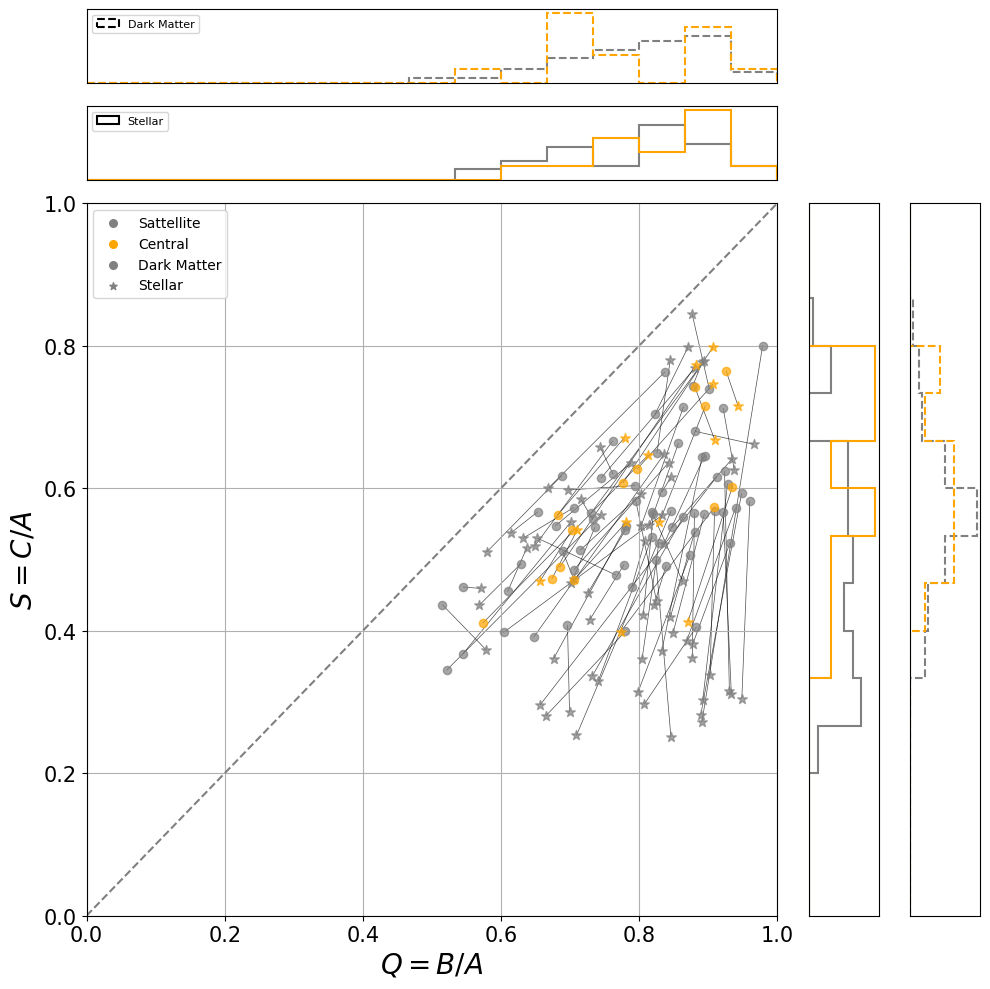

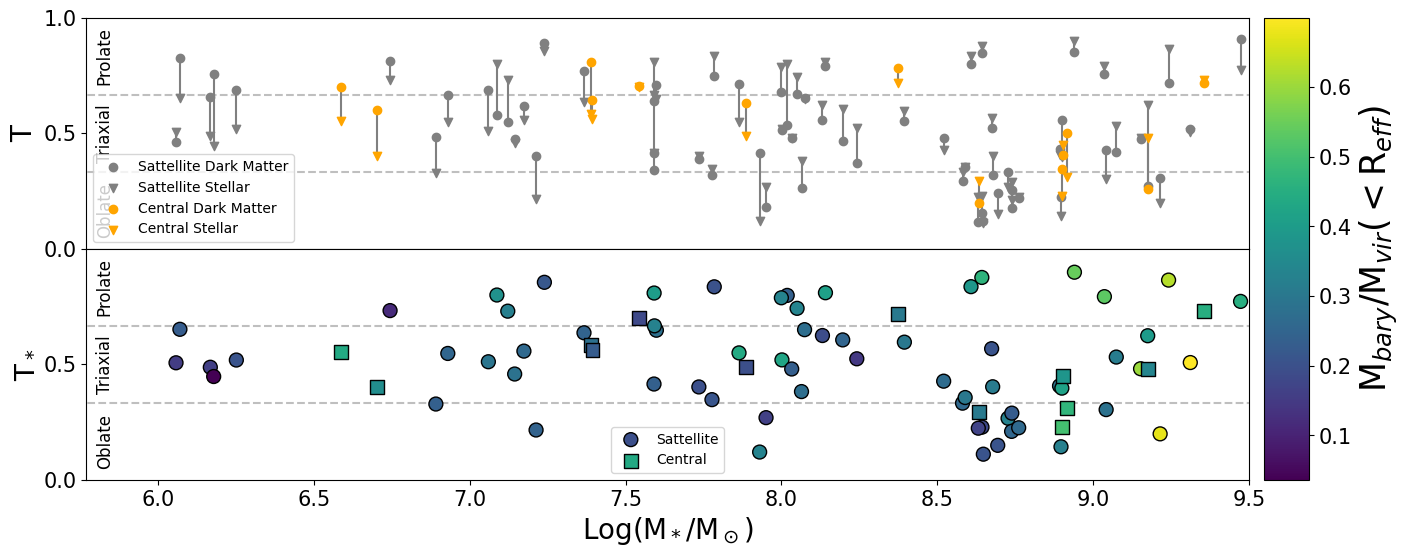

Sattellite galaxies: B_D/B_* mean: 1.02, std: 0.12
Central galaxies: B_D/B_* mean: 0.95, std: 0.13
Sattellite galaxies: C_D/C_* mean: 1.27, std: 0.44
Central galaxies: C_D/C_* mean: 1.00, std: 0.27
Sattellite galaxies: T_D/T_* mean: 1.06, std: 0.41
Central galaxies: T_D/T_* mean: 1.15, std: 0.31


In [43]:
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'QvS_sat.png'
sattellite_mask = htype == 'o'
labels = {'sattellite': 'Sattellite', 'central': 'Central', 'B': 'Q', 'C': 'S'}
colors = {'sattellite': 'gray', 'central': 'orange'}
masks = {'sattellite': sattellite_mask, 'central': ~sattellite_mask}


plotter = pc.GeneralPlotter(data, masks, labels, colors)
plotter.plot_data_with_masks('B', 'C', show_lines=True, show_scatter=True, filename=folder + filename)
plotter.calculate_shape_diff()
plotter.plot_triaxiality_vs_mass()
plotter.calculate_shape_diff()


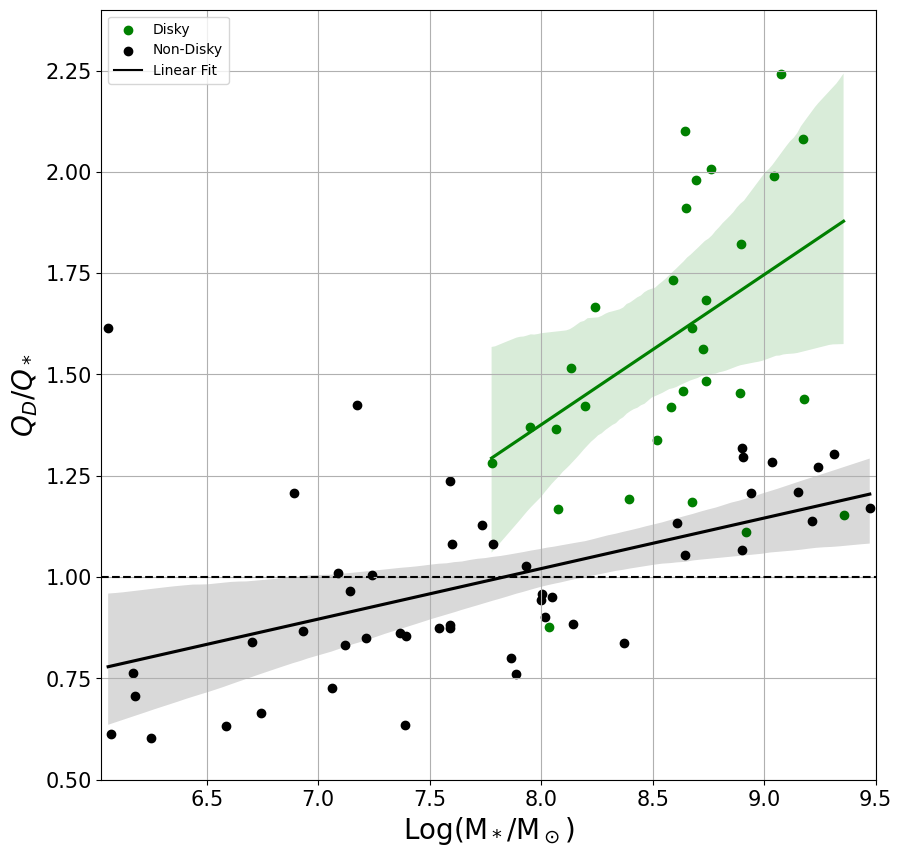

In [46]:

import importlib
importlib.reload(sdt)
sdt.MvC_diffBdiff_disks(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, disk_mask, mergers=None)

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/MergerShapes.MerianCDM.pickle'

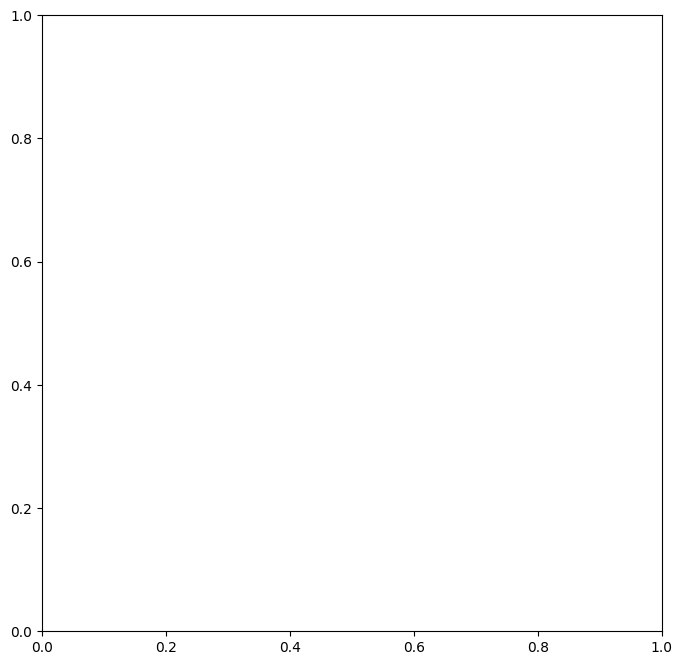

In [55]:
#load pickle files f'../../Data/MergerShapes.{feedback}.pickle', 'wb'))
feedbacks = ['MerianCDM']
fig,ax = plt.subplots(1,1,figsize=(8,8))
for feedback in feedbacks:
    mergers = pickle.load(open(f'../../Data/MergerShapes.{feedback}.pickle', 'rb'))
    for sim in mergers:
        for halo in mergers[sim]:
            colors = ['r','b','g']
            for snapshot,color in zip(mergers[sim][halo],colors):
                B_s = mergers[sim][halo][snapshot]['ba_s_smoothed_at_Reff']
                C_s = mergers[sim][halo][snapshot]['ca_s_smoothed_at_Reff']
                B_d = mergers[sim][halo][snapshot]['ba_d_smoothed_at_Reff']
                C_d = mergers[sim][halo][snapshot]['ca_d_smoothed_at_Reff']
                T_s = T(B_s,C_s)
                T_d = T(B_d,C_d)
                ax.scatter(B_s,C_s,c=color,marker='*',label='Stellar')
                ax.scatter(B_d,C_d,c=color,marker='o',label='Dark Matter')
                ax.plot([B_s,B_d],[C_s,C_d],c=color)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('B/A')
ax.set_ylabel('C/A')
ax.set_title('Merger Shapes')
ax.legend()
plt.show()

                
                

In [53]:
print(sims)

['cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'elektra'
 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'rogue' 'rogue' 'rogue'
 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'h148' 'h148' 'h148'
 'h148' 'h148' 'h148' 'h148' 'h148' 'h229' 'h229' 'h229' 'h229' 'h242'
 'h242' 'r442' 'r468' 'r488' 'r489' 'r492' 'r502' 'r523' 'r544' 'r552'
 'r555' 'r556' 'r563' 'r569' 'r571' 'r597' 'r613' 'r614' 'r642' 'r656'
 'r716' 'r718' 'r753' 'r761' 'r850' 'r852' 'r886' 'r916' 'r918' 'r977']


In [56]:
distances = np.sqrt((B_d - B_s)**2 + (C_d - C_s)**2)
T_diff = T_d - T_s
print('all data')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=None)
print('disky')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=mask)
print('non-disky')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=~mask)

all data
Mean T_diff = 0.001, Std T_diff = 0.13, Mean Distances = 0.17, Std Distances = 0.11
disky
Mean T_diff = -0.007, Std T_diff = 0.13, Mean Distances = 0.18, Std Distances = 0.11
non-disky
Mean T_diff = 0.017, Std T_diff = 0.12, Mean Distances = 0.15, Std Distances = 0.11


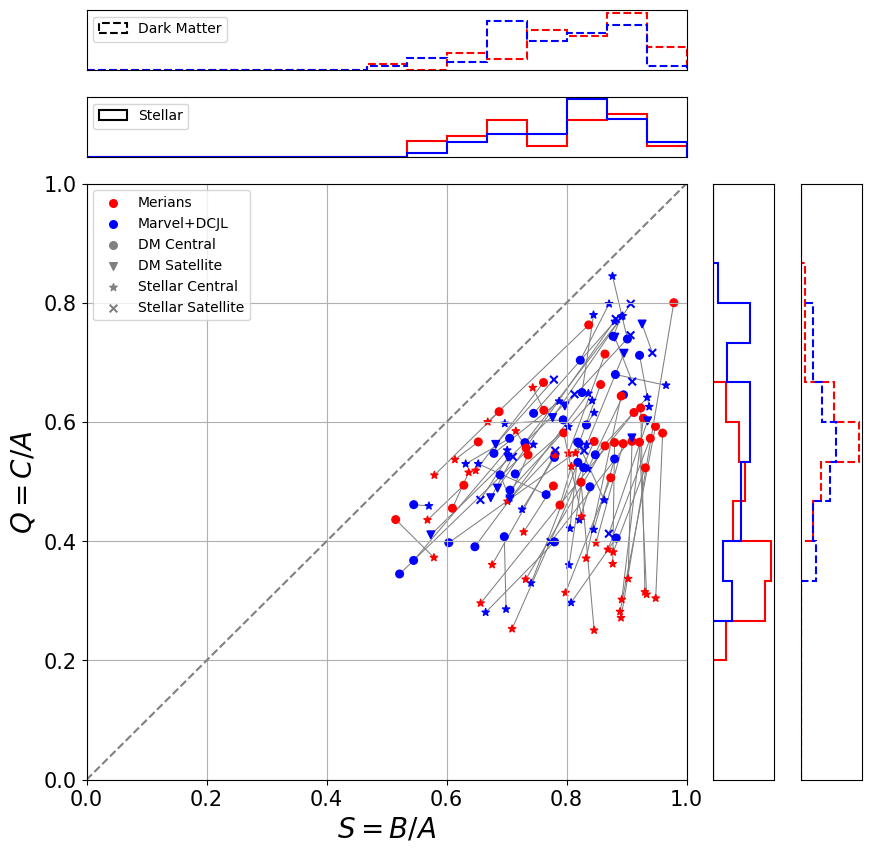

In [56]:
import importlib
importlib.reload(sdt)


#sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type,condition=None)


In [81]:


print((mask))

# B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims,hids,mergers = B_s[~mask],C_s[~mask],T_s[~mask],B_d[~mask],C_d[~mask],T_d[~mask],masses[~mask],mb[~mask],htype[~mask],reff[~mask],mvir[~mask],feedback_type[~mask],sims[~mask],hids[~mask],mergers[~mask]



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. nan nan  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


In [9]:
print(mergers.shape)
#print non [[nan, nan ]] mergers
# but do print [[nan, float]] mergers
print(mergers[~np.isnan(mergers).all(axis=2)])


(76, 1, 2)
[[0.17810017 0.10237943]
 [0.22633742 0.14154529]
 [       nan 0.01973334]
 [0.05835533 0.07839803]]


In [76]:
import importlib
importlib.reload(sdt)
from StellarDMTracing import colors

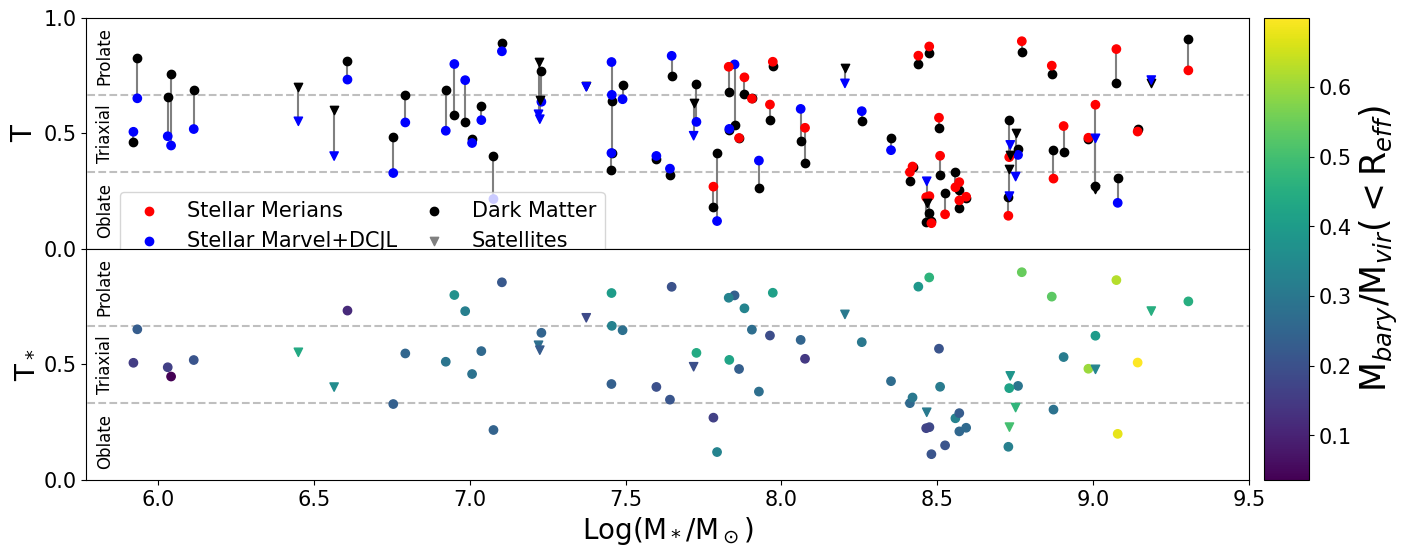

In [105]:
plt.style.use('default')
sdt.T_vs_Mstar(T_d,T_s,masses,mb_reff,htype,feedback_type)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

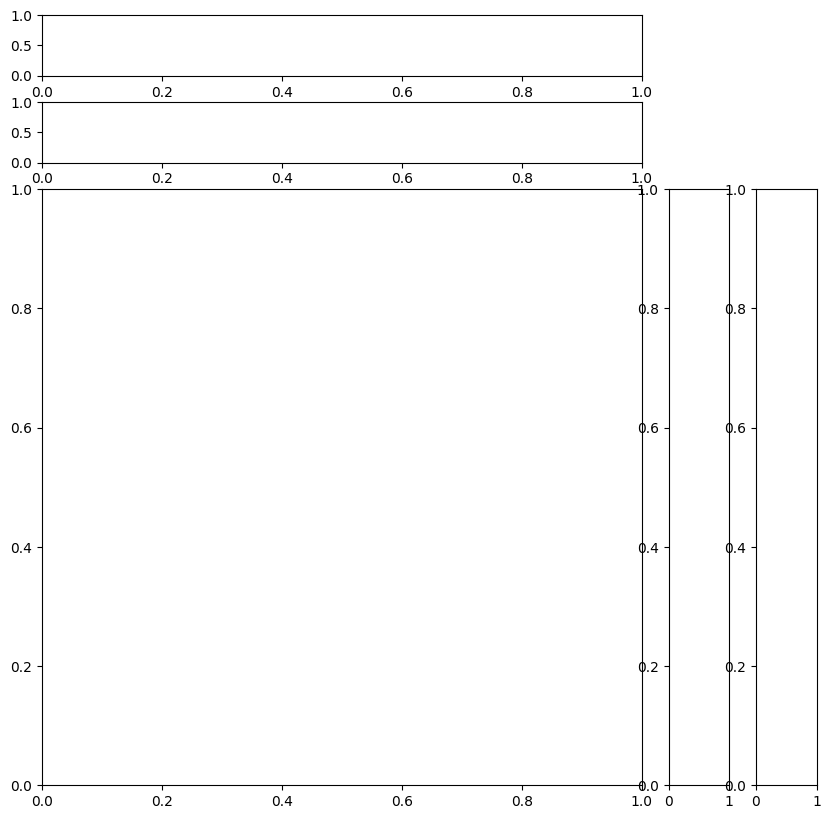

In [58]:
sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type,mergers,show_lines=True) 


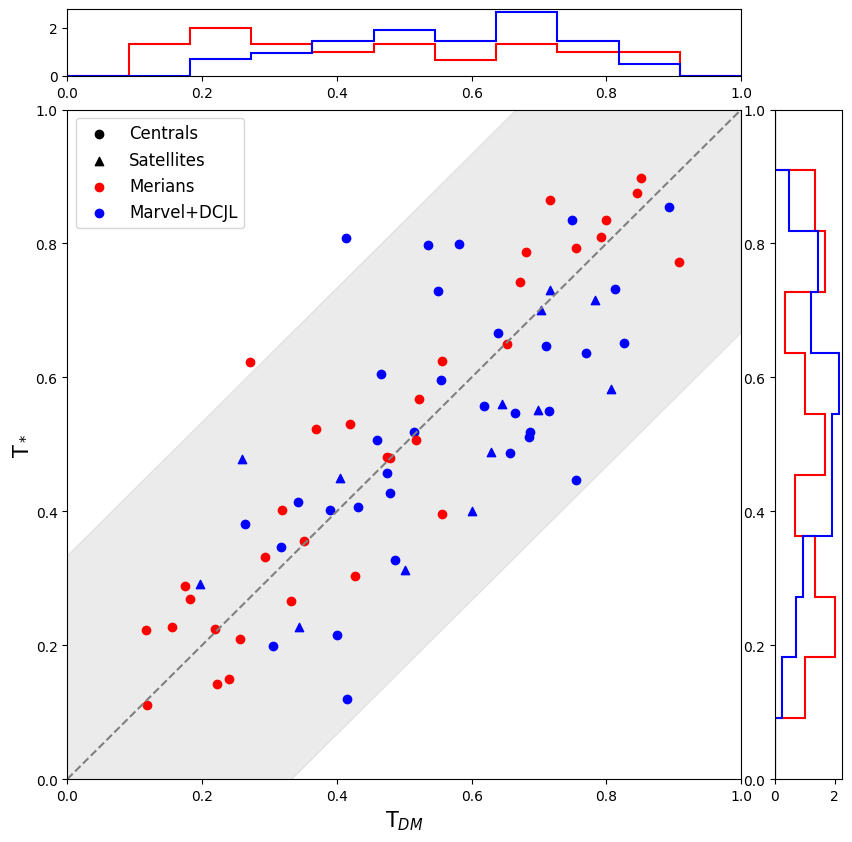

In [60]:
sdt.T_vs_Tdm(T_d, T_s,masses,htype,feedback_type,legend = ['Marvel+DCJL','Merians'],label = 'CDM')

slope: 0.28228389851679475, intercept: -1.0069724453405724, r: 0.5659012582282619, pval: 5.484548756571218e-08, stderr: 0.04686801223299684, intercept_stderr: 0.3731364594756722
slope: 0.08658140911703924, intercept: 0.32116733911729145, r: 0.5994666483073576, pval: 5.306895747748975e-09, stderr: 0.013174107350917376, intercept_stderr: 0.1048847505892915


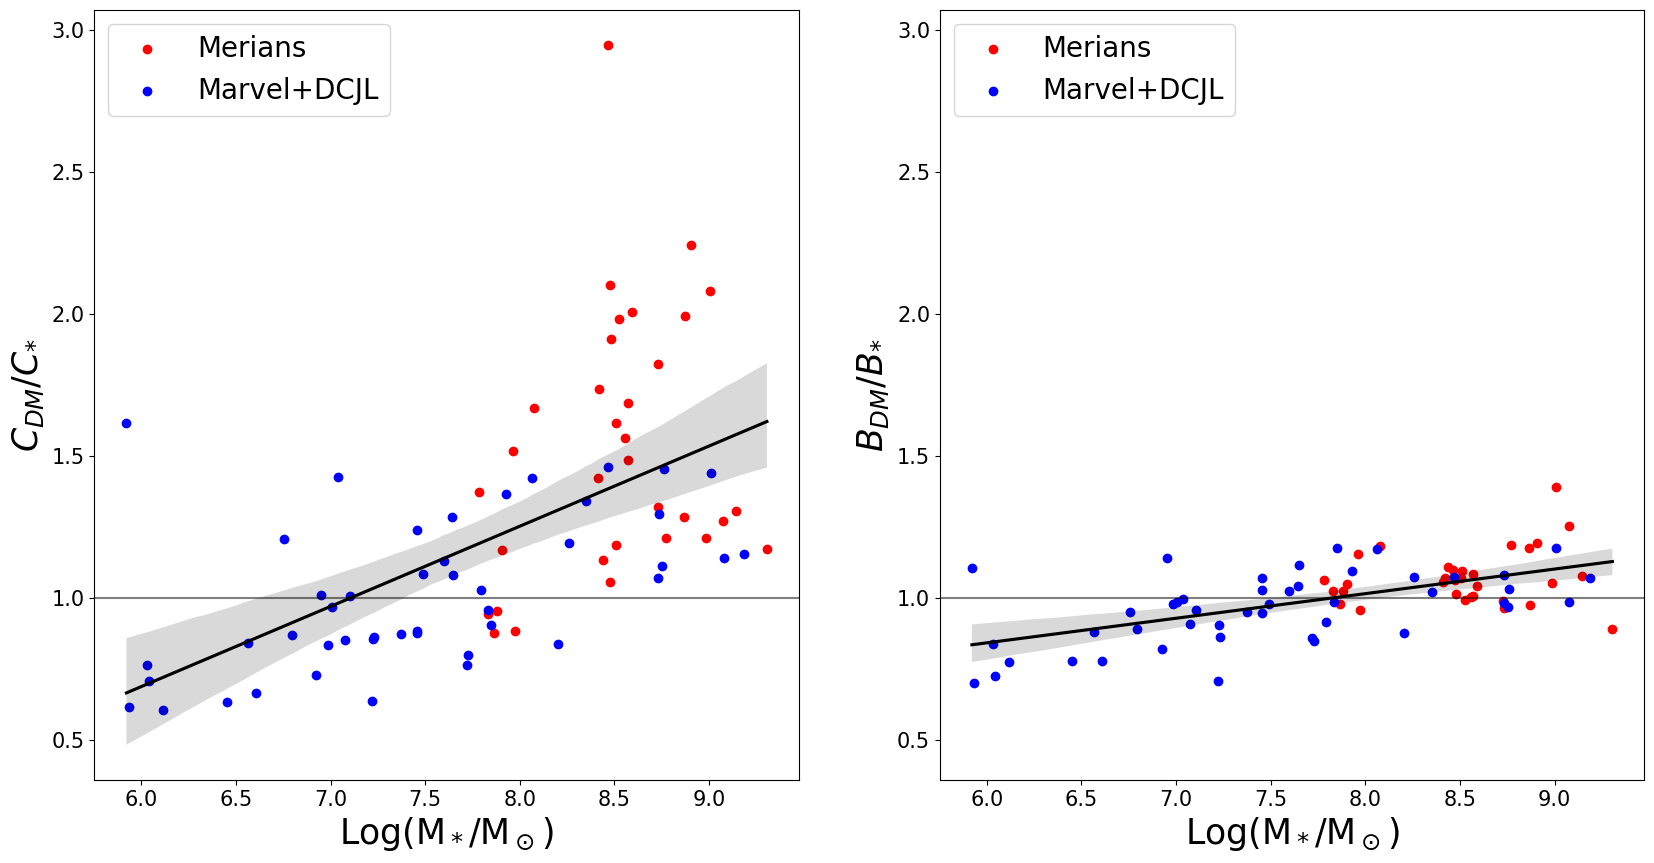

In [61]:
plt.style.use('default')

def axis_difference(d,s):
    #absolote difference
    #return d-s
    #relative difference
    avg = np.average([d, s], axis=0)
    #return (d-s)/avg
    #ratio
    return d/s

fig,axes = plt.subplots(1,2,figsize=(20,10))
ax = axes[0]
#ax.set_ylim([.4,2.4])

c_ratio = axis_difference(C_d,C_s)
# now plotting ratio of C_d/C_s
ylabel = r'$C_{DM}/C_{*}$'
#ylabel = r'$\Delta C = \frac{C_{DM} - C_{*}}{\bar{C}}$'
sdt.plot_DM_S_axes_diffs(ax,c_ratio,masses,feedback_type,ylabel)

axes[1].sharey(axes[0])

ax=axes[1]
b_ratio = axis_difference(B_d,B_s)
ylabel = r'$B_{DM}/B_{*}$'
#ylabel = r'$\Delta B = \frac{B_{DM} - B_{*}}{\bar{B}}$'
sdt.plot_DM_S_axes_diffs(ax,b_ratio,masses,feedback_type,ylabel)


def plot_DM_S_axes_diffs(ax,c_diff,masses,feedback_type,ylabel):

    ax.scatter(masses[feedback_type == 'MerianCDM'], c_diff[feedback_type == 'MerianCDM'], label='Merians',
               c=colors['MerianCDM'])
    ax.scatter(masses[feedback_type == 'BWMDC'], c_diff[feedback_type == 'BWMDC'], label='Marvel+DCJL',
               c=colors['BWMDC'])
    # plot y = 0 line
    ax.axhline(1, c='k', linestyle='-', alpha=.5)
    ax.set_xlabel(r'Log(M$_*$/M$_\odot$)', fontsize=25)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.legend(loc='upper left', prop={'size': 20})
    # linear fit and show error on plot
    # increase tick size and font
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

    # sns.regplot(x=masses[feedback_type=='MerianCDM'],y=c_diff[feedback_type=='MerianCDM'],ax=ax,scatter=False)
    # sns.regplot(x=masses[feedback_type=='BWMDC'],y=c_diff[feedback_type=='BWMDC'],ax=ax,scatter=False)
    sns.regplot(x=masses, y=c_diff, ax=ax, scatter=False, color='k', label='Linear Fit')
    # get linear fit parameters using scipy.stats.linregress
    from scipy.stats import linregress
    LinregressResult = linregress(masses, c_diff)
    slope = LinregressResult.slope
    intercept = LinregressResult.intercept
    rv = LinregressResult.rvalue
    pval = LinregressResult.pvalue
    stderr = LinregressResult.stderr
    intercept_stderr = LinregressResult.intercept_stderr
    print(
        f'slope: {slope}, intercept: {intercept}, r: {rv}, pval: {pval}, stderr: {stderr}, intercept_stderr: {intercept_stderr}')

    # plot linear fit
    x = np.linspace(6, 9.5, 100)
    y = slope * x + intercept
    # ax.plot(x,y,c='k',linestyle='--',label='Linear Fit')
    # add confidence interval from both slope error and intercept error


#ax.text(6.5,.2,r'$\Delta C = {slope:.2f}M_* + {intercept:.2f}$',fontsize=15)
fig.savefig(f'../../Figures/3DShapes/MvC_diff.png',bbox_inches='tight',pad_inches=.1,dpi = 300)

#create a similar plot but instead of mass use m_b/m_vir within Reff as x axis
#also try plotting disky vs nondisky for colors instead of feedback type
#change labels to Q and S instead of B and C






In [6]:
import astropy
#test astropy
print(astropy.__version__)

6.1.2


In [42]:
from astropy import units as u
from astropy import constants as const
import numpy as np

def calculate_dynamical_time(r_vir, M_halo):
    # Convert input parameters to Astropy quantities
    r_vir = r_vir * u.kpc
    M_halo = M_halo * u.solMass
    r_vir = r_vir.to(u.kpc)
    M_halo = M_halo.to(u.solMass)

    # Calculate dynamical time
    t_dyn = np.sqrt(r_vir**3 / (const.G * M_halo))

    return t_dyn.to(u.Gyr)


t_dyn = []
# Calculate dynamical time for each galaxy
for i in range(len(rvir)):
    r_vir = rvir*10
    M_halo = mvir[i]
    t = calculate_dynamical_time(r_vir, M_halo)
    print(f'r_vir: {r_vir:.2f}, M_halo: {M_halo:.2e}, t_dyn: {t:.2f}')
    t_dyn.append(t.value)

r_vir: 11.91, M_halo: 1.13e+10, t_dyn: 0.18 Gyr
r_vir: 17.88, M_halo: 7.21e+09, t_dyn: 0.42 Gyr
r_vir: 7.99, M_halo: 6.39e+09, t_dyn: 0.13 Gyr
r_vir: 7.26, M_halo: 5.48e+09, t_dyn: 0.12 Gyr
r_vir: 5.50, M_halo: 4.81e+09, t_dyn: 0.09 Gyr
r_vir: 4.91, M_halo: 3.72e+09, t_dyn: 0.08 Gyr
r_vir: 16.33, M_halo: 3.05e+10, t_dyn: 0.18 Gyr
r_vir: 8.23, M_halo: 2.12e+10, t_dyn: 0.08 Gyr
r_vir: 11.25, M_halo: 1.79e+10, t_dyn: 0.13 Gyr
r_vir: 13.81, M_halo: 1.40e+10, t_dyn: 0.20 Gyr
r_vir: 7.65, M_halo: 1.12e+10, t_dyn: 0.09 Gyr
r_vir: 3.20, M_halo: 2.78e+09, t_dyn: 0.05 Gyr
r_vir: 2.48, M_halo: 3.00e+09, t_dyn: 0.03 Gyr
r_vir: 39.01, M_halo: 5.56e+10, t_dyn: 0.49 Gyr
r_vir: 34.81, M_halo: 2.57e+10, t_dyn: 0.60 Gyr
r_vir: 12.15, M_halo: 1.77e+10, t_dyn: 0.15 Gyr
r_vir: 19.16, M_halo: 1.23e+10, t_dyn: 0.36 Gyr
r_vir: 5.02, M_halo: 7.03e+09, t_dyn: 0.06 Gyr
r_vir: 3.97, M_halo: 6.15e+09, t_dyn: 0.05 Gyr
r_vir: 6.45, M_halo: 5.86e+09, t_dyn: 0.10 Gyr
r_vir: 9.11, M_halo: 5.80e+09, t_dyn: 0.17 Gyr
r_vi

In [38]:
print(t_dyn)

[0.18200099 0.4195824  0.13336607 0.12451855 0.08761267 0.08399382
 0.17823547 0.07647617 0.13295629 0.20469267 0.09427798 0.05119001
 0.03362057 0.48697069 0.60414951 0.14984285 0.35698645 0.06334587
 0.04755675 0.10094003 0.17023118 0.06104063 0.2591357  0.05327917
 0.61067052 0.12895539 0.30039934 0.13736286 0.14739776 0.14722475
 0.05032569 0.11777837 0.33363698 0.50836407 0.39939525 0.38918267
 0.26772415 0.1386219  0.13754802 0.91858291 0.14212494 0.19707225
 0.30389096 0.83512331 0.57199279 0.52581336 0.32430487 0.05181704
 0.11938884 0.15587988 0.54775995 0.07688861 0.66637165 0.34706966
 0.34398829 0.26964886 0.09505013 0.11090361 0.10235724 0.41110847
 0.44853761 0.31255877 0.20815633 0.65889684 0.44559052 0.30925936
 0.07342815 0.44597231 0.14881455 0.32166367 0.08462128 0.07414149
 0.20910795 0.11917661 0.30605301 0.26741152]


In [37]:

#get avg, std, min, max
t_dyn = np.array(t_dyn)
print(f'Average dynamical time: {np.mean(t_dyn):.2f}')
print(f'Standard deviation of dynamical time: {np.std(t_dyn):.2f}')
print(f'Minimum dynamical time: {np.min(t_dyn):.2f}')
print(f'Maximum dynamical time: {np.max(t_dyn):.2f}')





Average dynamical time: 0.26
Standard deviation of dynamical time: 0.20
Minimum dynamical time: 0.03
Maximum dynamical time: 0.92


In [282]:
mask = abs(T_d - T_s) < .05
#print(sum(mask))

#print(T_d[mask],T_s[mask],T_d[mask]-T_s[mask])

#look for repeated values in T_d and T_s
for i in range(len(T_d)):
    for j in range(i+1,len(T_d)):
        if T_d[i] == T_d[j] or T_s[i] == T_s[j]:
            print(i,j)
            print(T_d[i],T_s[i],T_d[j],T_s[j])




In [226]:
SimFilePath = ['../PickleFiles/SimulationInfo.MerianCDM.pickle','../PickleFiles/SimulationInfo.MerianSIDM.pickle']
MassPath = ['../../Data/BasicData/MerianCDM.Masses.pickle','../../Data/BasicData/MerianSIDM.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.MerianCDM.txt','../../Data/BasicData/HaloTypes.MerianSIDM.txt']
feedback = ['MerianCDM','MerianSIDM']
B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims = sdt.LoadSimData(SimFilePath,MassPath,HaloTypePath,feedback,return_sims=True)

#main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,r[i])

TypeError: LoadSimData() got multiple values for argument 'return_sims'

r488 r488
r492 r492
r618 r618
r544 r544
r523 r523
r468 r468
r634 r634
r597 r597
Triaxality
Length of idx_CDM: 1
Contents of idx_CDM: [13]


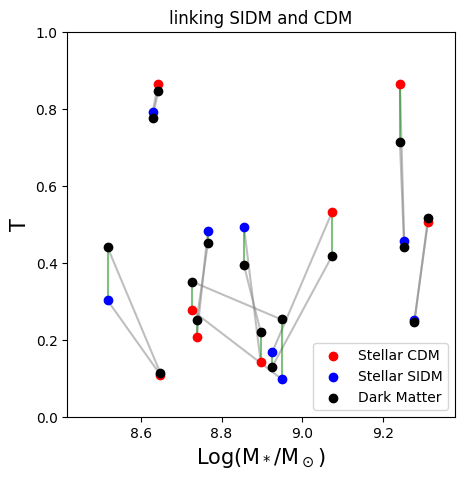

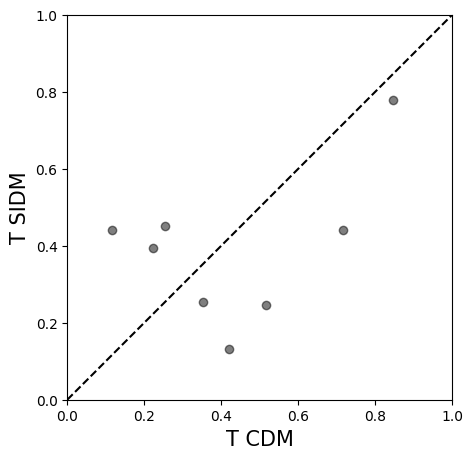

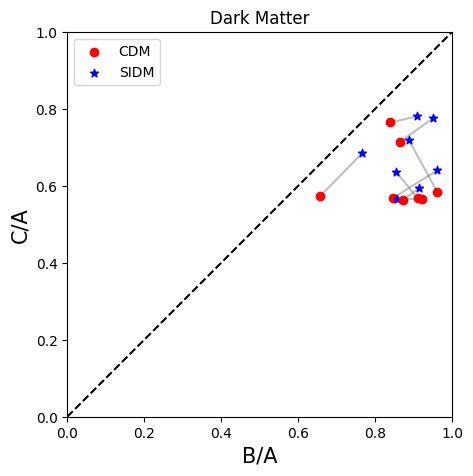

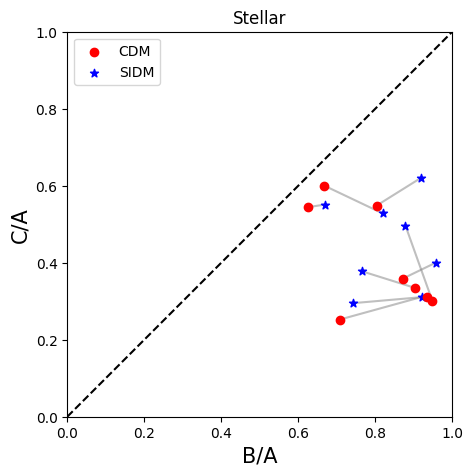

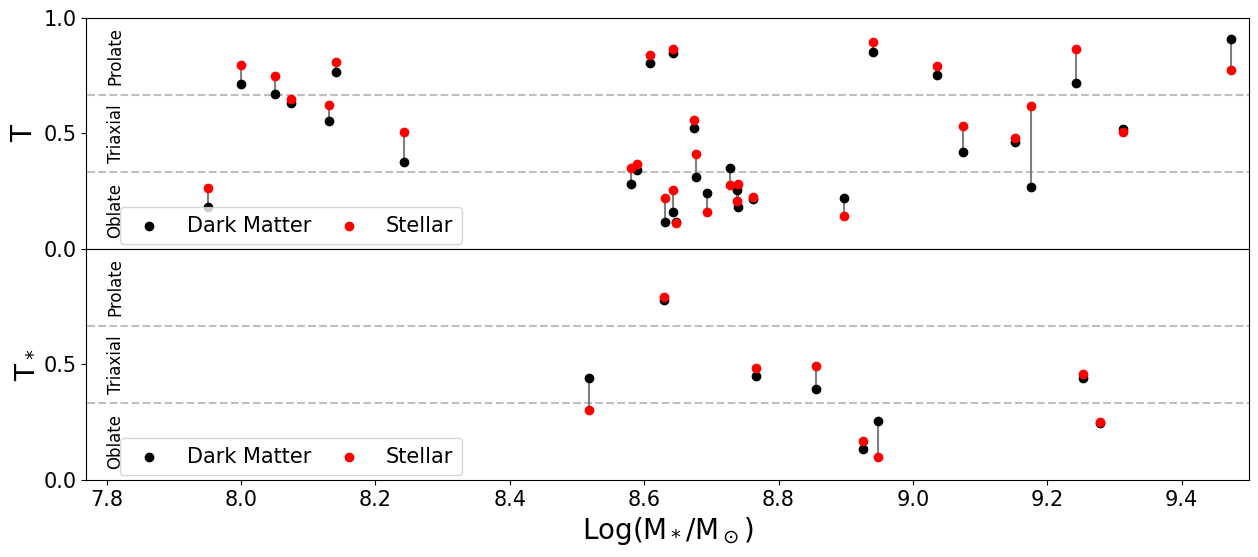

In [192]:
sdt.plot_SIDM_CDM(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims)

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

dpi = 300


#Convert lists to arrays for htype indexing
T_d,T_s,masses,mb,htype = np.array(T_d),np.array(T_s),np.array(masses),np.array(mb),np.array(htype)
B_s,C_s,B_d,C_d = np.array(B_s),np.array(C_s),np.array(B_d),np.array(C_d)

#T* vs Tdm
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.fill_between([0,1],[-1/3,2/3],[1/3,4/3],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_ylabel(r'T$_*$',fontsize=15)
ax.set_xlabel(r'T$_{DM}$',fontsize=15)

norm = plt.Normalize(int(min(masses)),int(max(masses))+.1)
p = ax.scatter(T_d[htype=='o'],T_s[htype=='o'],marker='o',c=masses[htype=='o'],cmap='viridis',norm=norm)
ax.scatter(T_d[htype=='v'],T_s[htype=='v'],marker='v',c=masses[htype=='v'],cmap='viridis',norm=norm,label='Satellites')
cbar = f.colorbar(p,cax=f.add_axes([.91,.11,.03,.77]))
cbar.set_label(r'Log(M$_*$/M$_\odot$)',fontsize=15)

ax.legend(loc='lower left',prop={'size':12})
f.savefig(f'../../Figures/3DShapes/T_Comparison.png',bbox_inches='tight',pad_inches=.1,dpi = dpi)

In [ ]:
#B/A vs C/A links
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
#ax.fill_between([0,1],[-.1,.9],[.1,1.1],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_xlabel(r'$S$',fontsize=20)
ax.set_ylabel(r'$Q$',fontsize=20)
ax.tick_params(which='both',labelsize=15)
ax.scatter(-1,-1)

for i in np.arange(len(B_s)):
    ax.plot([B_s[i],B_d[i]],[C_s[i],C_d[i]],c='.5',zorder=0)

f.savefig(f'../../Figures/3DShapes/CvB.LinksOnly.png',bbox_inches='tight',pad_inches=.1)

ax.scatter(B_d[htype=='o'],C_d[htype=='o'],c='k',label='Dark Matter')
ax.scatter(B_d[htype=='v'],C_d[htype=='v'],c='k',marker='v')
ax.scatter(B_s[htype=='o'],C_s[htype=='o'],c='r',label='Stellar')
ax.scatter(B_s[htype=='v'],C_s[htype=='v'],c='r',marker='v')
ax.scatter(-1,-1,c='.5',marker='v',label='Satellites')

ax.legend(loc='upper left',prop={'size':15})
f.savefig(f'../../Figures/3DShapes/CvB.Links.png',bbox_inches='tight',pad_inches=.1,dpi = dpi)

In [ ]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print([matplotlib.font_manager.FontProperties(fname=f).get_name() for f in fonts])


In [ ]:
import matplotlib.font_manager
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

In [19]:
#create contour plot of triaxiality on a B/A vs Q/A plot
#create meshgrid for B/A and Q/A
B = np.linspace(0,.999,100)
C = np.linspace(0,.999,100)
B,C = np.meshgrid(B,C)
#remove points where C > B
mask = C > B
B[mask] = np.nan
C[mask] = np.nan

T_c = T(B,C)


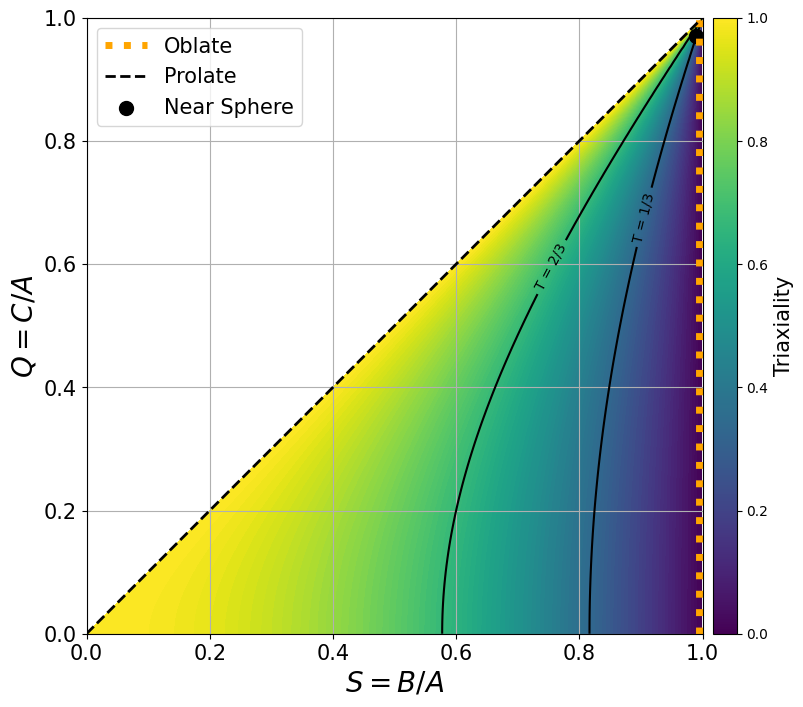

In [20]:
#create colored contour plot
f,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
#ax.fill_between([0,1],[-.1,.9],[.1,1.1],color='0.75',alpha=.3)
#ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_xlabel(r'$S=B/A$',fontsize=20)
ax.set_ylabel(r'$Q=C/A$',fontsize=20)
ax.tick_params(which='both',labelsize=15)
ax.scatter(-1,-1)
ax.contourf(B,C,T_c,cmap='viridis',levels=100)
#add labeled contour lines as T = .33,.66 with inline labels
CS = ax.contour(B,C,T_c,levels=[1/3,2/3],colors='k')
labels = ['T = 1/3','T = 2/3']
fmt = {}

for l, s in zip(CS.levels, labels):
    fmt[l] = s
ax.clabel(CS, inline=True, fontsize=10, fmt=fmt)
ax.set_aspect('equal')


#add colorbar for T
norm = plt.Normalize(0,1)
cbar = f.colorbar(plt.cm.ScalarMappable(norm=norm,cmap='viridis'),cax=f.add_axes([.91,.11,.03,.77]))
cbar.set_label(r'Triaxiality',fontsize=15)

#add labels for oblate and prolate as lines
#oblate is T = 0 or vertical line at B = 1
ax.axvline(.995,c='orange',linestyle='dotted',label='Oblate',lw=5)

#prolate is T = 1 or 1-1 line
ax.plot([0,1],[0,1],c='k',linestyle='--',label='Prolate',lw=2)

#add label to near sphere
ax.scatter([.99],[.97],c='k',label='Near Sphere',s=100)

ax.legend(loc='upper left',prop={'size':15})




#add gridlines
ax.grid(True)
folder = '/home/bk639/OverLeaf/ShapePaper/figures/'
filename = 'TriaxialityContour.png'
f.savefig(folder + filename,bbox_inches='tight',pad_inches=.1,dpi = 300)





